# Galaxy10 Tutorial

*  **Henry W.H. Leung** - Astronomy Undergraduate, University of Toronto - henrysky
* Project advisor: **Jo Bovy** - Professor, Department of Astronomy and Astrophysics, University of Toronto - jobovy
*  Contact Henry: henrysky.leung [at] mail.utoronto.ca
* This tutorial is created on 10/Feb/2018 with Keras 2.1.3, Tensorflow 1.6.0, Nvidia CuDNN 7.0 for CUDA 9.0 (Optional), Python 3.6.3 Win10 x64

* astroNN github: https://github.com/henrysky/astroNN

* astroNN documentation: http://astronn.readthedocs.io/

1. Galaxy10 dataset classification labels come from Galaxy Zoo
2. Galaxy10 dataset images come from Sloan Digital Sky Survey (SDSS)

![](galaxy10_example.png)

C:\Users\Henry\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


C:\Users\Henry\.astroNN\datasets\Galaxy10.h5 was found!
===================Data Inspection===================


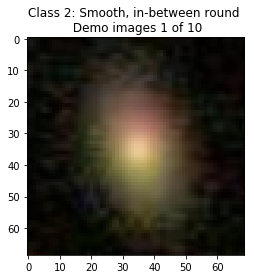

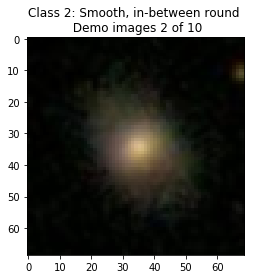

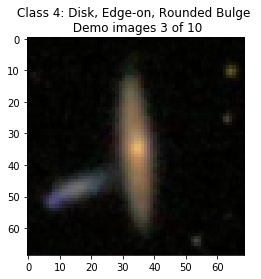

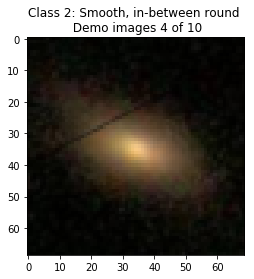

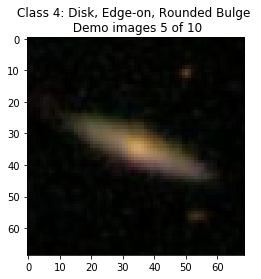

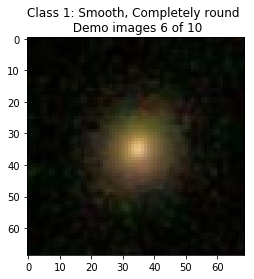

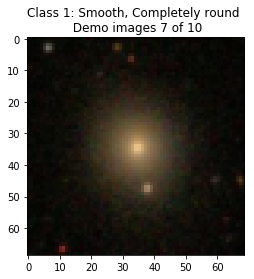

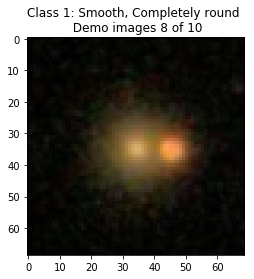

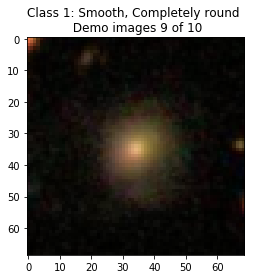

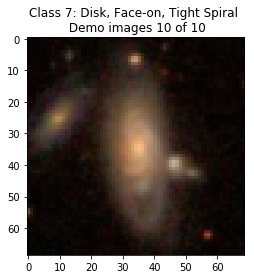

===============Data Inspection Finished===============
Number of Training Data: 17646, Number of Validation Data: 1960
====Message from Normalizer====
You selected mode: 255
Featurewise Center: False
Datawise Center: False
Featurewise std Center: False
Datawise std Center: False
====Message ends====
====Message from Normalizer====
You selected mode: 0
Featurewise Center: False
Datawise Center: False
Featurewise std Center: False
Datawise std Center: False
====Message ends====
Epoch 1/5
 - 7s - loss: 1.5854 - categorical_accuracy: 0.4109 - val_loss: 1.3888 - val_categorical_accuracy: 0.4755
Epoch 2/5
 - 5s - loss: 1.2100 - categorical_accuracy: 0.5718 - val_loss: 1.1427 - val_categorical_accuracy: 0.6193
Epoch 3/5
 - 5s - loss: 1.0829 - categorical_accuracy: 0.6454 - val_loss: 1.0680 - val_categorical_accuracy: 0.6516
Epoch 4/5
 - 5s - loss: 1.0329 - categorical_accuracy: 0.6727 - val_loss: 1.0956 - val_categorical_accuracy: 0.6635
Epoch 5/5

Epoch 00005: ReduceLROnPlateau reducing lear

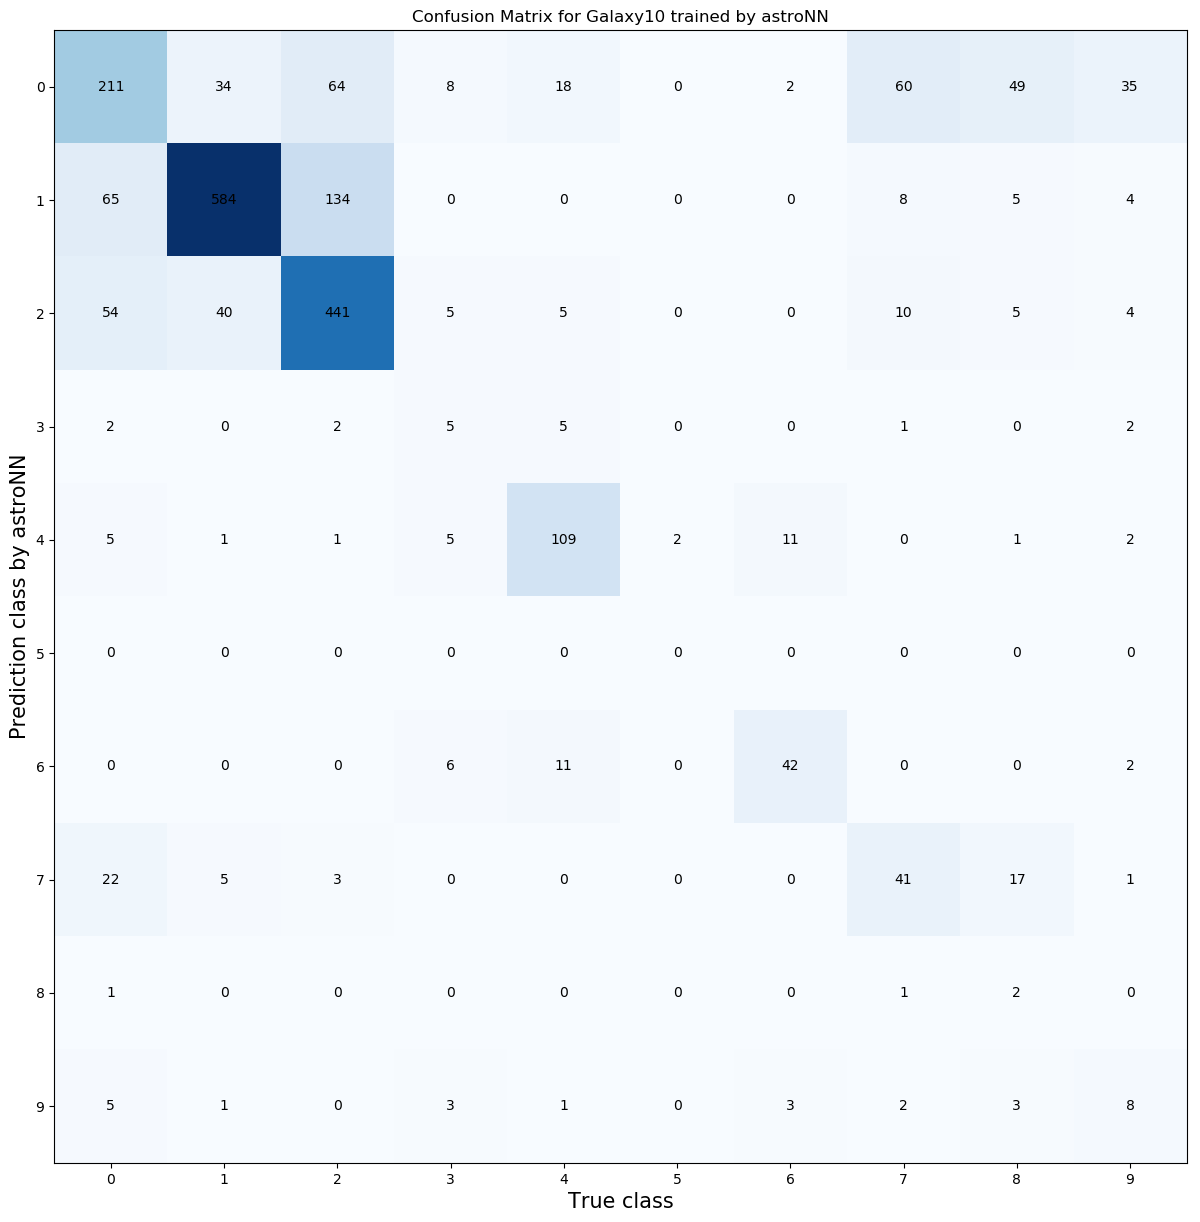

In [1]:
from keras.utils import np_utils
import numpy as np
from sklearn.model_selection import train_test_split
import pylab as plt

from astroNN.models import Galaxy10_CNN
from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup, galaxy10_confusion

# To load images and labels (will download automatically at the first time)
# First time downloading location will be ~/.astroNN/datasets/
images, labels = galaxy10.load_data()

# To convert the labels to categorical 10 classes
labels = np_utils.to_categorical(labels, 10)

# Select 10 of the images to inspect
img = None
plt.ion()
print('===================Data Inspection===================')
for counter, i in enumerate(range(np.random.randint(0, labels.shape[0], size=10).shape[0])):
    img = plt.imshow(images[i])
    plt.title('Class {}: {} \n Demo images {} of 10'.format(np.argmax(labels[i]), galaxy10cls_lookup(labels[i]), counter+1))
    plt.draw()
    plt.pause(2.)
plt.close('all')
print('===============Data Inspection Finished===============')

# To convert to desirable type
labels = labels.astype(np.float32)
images = images.astype(np.float32)

train_idx, test_idx = train_test_split(np.arange(labels.shape[0]), test_size=0.1)
train_images, train_labels, test_images, test_labels = images[train_idx], labels[train_idx], images[test_idx], labels[test_idx]

# To create a neural network instance
galaxy10net = Galaxy10_CNN()

galaxy10net.max_epochs = 5

# To train the nerual net
# astroNN will normalize the data by default
galaxy10net.train(train_images, train_labels)

# After the training, you can test the neural net performance
# Please notice predicted_labels are labels predicted from neural network. test_labels are ground truth from the dataset
predicted_labels = galaxy10net.test(test_images)

# Convert predicted_labels to class
prediction_class = np.argmax(predicted_labels, axis=1)

# Convert test_labels to class
test_class = np.argmax(test_labels, axis=1)

# Prepare a confusion matrix
confusion_matrix = np.zeros((10,10))

# create the confusion matrix
for counter, i in enumerate(prediction_class):
    confusion_matrix[i, test_class[counter]] += 1

# Plot the confusion matrix
galaxy10_confusion(confusion_matrix)